In [169]:
import os
import csv
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
year_list = []
industry_list = []
quarter_list = []
industry_type_list = []
month1_list = []
month2_list = []
month3_list = []
total_wages_list = []

for each_csv_file in glob.glob("*.csv"):
    print(each_csv_file)
    
    csvpath = each_csv_file
    
    with open(csvpath, newline='') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        for row in csvreader:
            
            if row[0] == "06075":
                year_list.append(row[5])
                industry_list.append(row[10])
                industry_type_list.append(row[9])
                quarter_list.append(row[6])
                month1_list.append(row[14])
                month2_list.append(row[15])
                month3_list.append(row[16])
                total_wages_list.append(row[17])
                
    csvfile.close()
print("Completed data collection")

collected_data_dict = {"Year": year_list, "Industry": industry_list, "Industry Type": industry_type_list,
                      "Quarter": quarter_list, "Emp Level Month #1": month1_list, "Emp Level Month #2": month2_list, "Emp Level Month #3": month3_list,
                      "Total Wages Collected": total_wages_list}
        
collected_data_df = pd.DataFrame(collected_data_dict)

2004_44-45_retail.csv
2004_72_food.csv
2005_44-45_retail.csv
2005_72_food.csv
2006_44-45_retail.csv
2006_72_food.csv
2007_44-45_retail.csv
2007_72_food.csv
2008_44-45_retail.csv
2008_72_food.csv
2009_44-45_retail.csv
2009_72_food.csv
2010_44-45_retail.csv
2010_72_food.csv
2011_44-45_retail.csv
2011_72_food.csv
2012_44-45_retail.csv
2012_72_food.csv
2013_44-45_retail.csv
2013_72_food.csv
2014_44-45_retail.csv
2014_72_food.csv
2015_44-45_retail.csv
2015_72_food.csv
2016_44-45_retail.csv
2016_72_food.csv
2017_44-45_retail.csv
2017_72_food.csv
Completed data collection


In [156]:
collected_data_df = collected_data_df[['Year', 'Industry', 'Industry Type', 'Quarter', 'Emp Level Month #1',
                                      'Emp Level Month #2', 'Emp Level Month #3', 'Total Wages Collected']]
collected_data_df = collected_data_df.sort_values(['Year', 'Industry']).reset_index(drop=True)

#Dropping government related jobs
collected_data_df_mod = collected_data_df.loc[collected_data_df['Industry Type']=='Private'].reset_index(drop=True)

In [157]:
collected_data_df_mod['Emp Level Month #1'] = pd.to_numeric(collected_data_df_mod['Emp Level Month #1'])
collected_data_df_mod['Emp Level Month #2'] = pd.to_numeric(collected_data_df_mod['Emp Level Month #2'])
collected_data_df_mod['Emp Level Month #3'] = pd.to_numeric(collected_data_df_mod['Emp Level Month #3'])
collected_data_df_mod['Total Wages Collected'] = pd.to_numeric(collected_data_df_mod['Total Wages Collected'])

In [158]:
group_year = collected_data_df_mod.groupby(["Year", "Industry"]).mean()
group_year.head()

Emp Level Month #1  Emp Level Month #2  \
Year Industry                                                                  
2004 Accommodation and food services            59207.75            59550.00   
     Retail trade                               42743.75            43100.00   
2005 Accommodation and food services            60379.50            60714.25   
     Retail trade                               42908.25            43247.75   
2006 Accommodation and food services            62823.50            63239.75   

                                      Emp Level Month #3  \
Year Industry                                              
2004 Accommodation and food services            60296.25   
     Retail trade                               43445.25   
2005 Accommodation and food services            61272.75   
     Retail trade                               43649.50   
2006 Accommodation and food services            63656.25   

                                      Total Wages Collected  
Year Industry                                                
2004 Accommodation and food services           3.477483e+08  
     Retail trade                              3.880420e+08  
2005 Accommodation and food services           3.683249e+08  
     Retail trade                              4.028113e+08  
2006 Accommodation and food services           3.984869e+08

In [159]:
group_year["Yearly Average Emp"] = (group_year['Emp Level Month #1']+group_year['Emp Level Month #2']+group_year['Emp Level Month #3'])/3

In [160]:
blah = group_year.groupby("Year").sum()
blah.head()

,Emp Level Month #1,Emp Level Month #2,Emp Level Month #3,Total Wages Collected,Yearly Average Emp
Year,,,,,
2004,101951.50,102650.00,103741.50,7.357904e+08,102781.000000
2005,103287.75,103962.00,104922.25,7.711362e+08,104057.333333
2006,105518.25,106223.50,106967.25,8.054694e+08,106236.333333
2007,108687.25,109782.00,110358.00,8.635605e+08,109609.083333
2008,111038.50,111368.25,111730.75,8.980925e+08,111379.166667


In [161]:
blah = blah.rename(columns={"Yearly Average Emp": "Yearly Total Emp"})
blah

,Emp Level Month #1,Emp Level Month #2,Emp Level Month #3,Total Wages Collected,Yearly Total Emp
Year,,,,,
2004,101951.50,102650.00,103741.50,7.357904e+08,102781.000000
2005,103287.75,103962.00,104922.25,7.711362e+08,104057.333333
2006,105518.25,106223.50,106967.25,8.054694e+08,106236.333333
2007,108687.25,109782.00,110358.00,8.635605e+08,109609.083333
2008,111038.50,111368.25,111730.75,8.980925e+08,111379.166667
2009,105114.25,105414.75,105110.75,8.347707e+08,105213.250000
2010,104666.25,104731.00,105621.25,8.588208e+08,105006.166667
2011,107205.00,108127.25,108858.50,9.184592e+08,108063.583333
2012,111761.75,112995.50,113505.00,9.869789e+08,112754.083333


In [162]:
percentage_change = blah.pct_change()

In [163]:
percentage_change_df = percentage_change[["Total Wages Collected", "Yearly Total Emp"]]

In [167]:
percentage_change_df = percentage_change_df.rename(columns={"Total Wages Collected": "Percentage Change (Wages)",
                                                           "Yearly Total Emp": "Percentage Change (Emp. Level)"})

In [175]:
percentage_change_df = percentage_change_df.reset_index()
percentage_change_df

,Year,Percentage Change (Wages),Percentage Change (Emp. Level)
0,2004,NaN,NaN
1,2005,0.048038,0.012418
2,2006,0.044523,0.020940
3,2007,0.072121,0.031748
4,2008,0.039988,0.016149
5,2009,-0.070507,-0.055360
6,2010,0.028810,-0.001968
7,2011,0.069442,0.029117
8,2012,0.074603,0.043405
9,2013,0.060773,0.036024


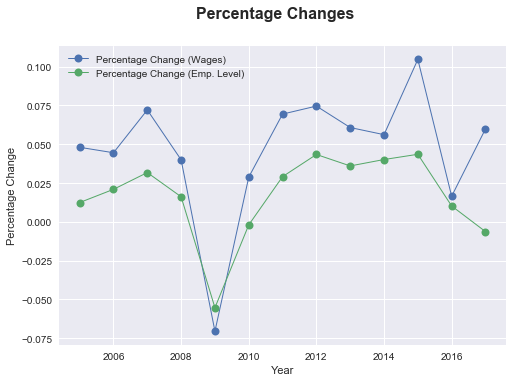

In [178]:
fig, ax1 = plt.subplots(1, sharex=True, sharey= True)
fig.suptitle("Percentage Changes", fontsize=16,
             fontweight="bold")

#ax1.set_xlim(min(year), max(year))
ax1.plot(percentage_change_df['Year'], percentage_change_df['Percentage Change (Wages)'], linewidth=1, marker="o", markersize=8)
ax1.plot(percentage_change_df['Year'], percentage_change_df['Percentage Change (Emp. Level)'], linewidth=1, marker="o", markersize=8)
ax1.set_ylabel("Percentage Change")
ax1.set_xlabel("Year")
plt.legend()
plt.show()